In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load historical price data from Excel file
df = pd.read_csv('/content/drive/MyDrive/stonks/nifty_data.csv')

In [ ]:
# Calculate moving averages (e.g., 20-day moving average)
window = 50
df['SMA'] = df['Close'].ewm(span=window, adjust=False).mean()


In [ ]:
# Calculate deviations from the moving average
df['Deviation'] = df['Close'] - df['SMA']

In [ ]:
# Identify reversions (e.g., when price crosses the moving average)
df['Reversion'] = 0
df.loc[df['Deviation'] > 0, 'Reversion'] = 1
df.loc[df['Deviation'] < 0, 'Reversion'] = -1

In [ ]:
# Calculate mean reversion values (averaging previous 10 reversions)
window_reversion = 10
df['MeanReversion'] = df['Reversion'].rolling(window=window_reversion).mean()


(15000.0, 20000.0)

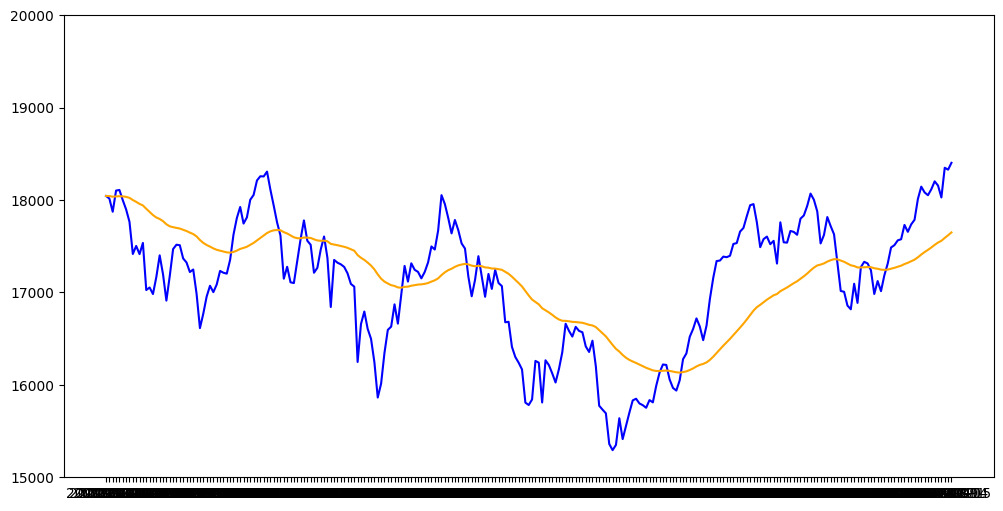

In [ ]:
# Plot historical prices, moving average, and mean reversion on a single graph
plt.figure(figsize=(12, 6))

# Plot historical close prices
plt.plot(df['Date'], df['Close'], label='Close Price', color='blue')

# Plot the moving average
plt.plot(df['Date'], df['SMA'], label=f'{window}-Day SMA', color='orange')

# Plot the zero line for mean reversion
plt.axhline(y=0, color='gray', linestyle='--', label='Mean Reversion Zero Line')

# Limit the y-axis range to values between 15,000 and 20,000
plt.ylim(15000, 20000)

FloatSlider(value=1.0, description='Zoom:', layout=Layout(width='80%'), max=5.0, min=0.1)

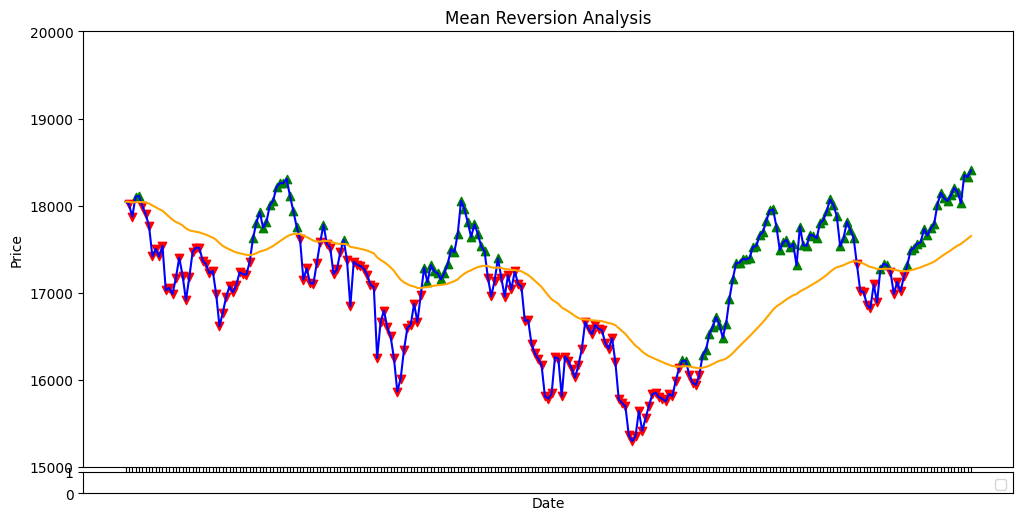

NameError: ignored

NameError: ignored

In [ ]:
# Create the figure and axes
fig, ax = plt.subplots(figsize=(12, 6))

# Plot historical prices, moving average, and mean reversion on a single graph
ax.plot(df['Date'], df['Close'], label='Close Price', color='blue')
ax.plot(df['Date'], df['SMA'], label=f'{window}-Day SMA', color='orange')

# Signal Buy and Sell Points
buy_signals = df[df['Reversion'] == 1]
sell_signals = df[df['Reversion'] == -1]
ax.scatter(buy_signals['Date'], buy_signals['Close'], marker='^', color='green', label='Buy Signal')
ax.scatter(sell_signals['Date'], sell_signals['Close'], marker='v', color='red', label='Sell Signal')

# Set the title and labels
ax.set_title('Mean Reversion Analysis')
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.set_ylim(15000, 20000)  # Limit the y-axis range

# Enable zoom and pan functionality
from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax)
cax = divider.append_axes('bottom', size='5%', pad=0.05)
cax.set_xticks([])

# Create zoom slider
from ipywidgets import widgets
from IPython.display import display

def update_plot(change):
    zoom = change.new
    num_dates = date2num(df['Date'])
    ax.set_xlim(num_dates[0], num_dates[-1] * zoom)
    ax.figure.canvas.draw()

zoom_slider = widgets.FloatSlider(value=1.0, min=0.1, max=5.0, step=0.1, description='Zoom:')
zoom_slider.layout.width = '80%'
zoom_slider.observe(update_plot, 'value')

# Display the zoom slider
display(zoom_slider)

# Show the plot
plt.legend()
plt.show()